In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import numpy as np

https://data.cityofchicago.org/browse/select_dataset?tags=shapefiles&utf8=%E2%9C%93

https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk

When you download the map data it comes with a .shp, .shx, .prj, and a .dbf file. You need all four of these to view the map in detail or you're just going to get a square of color. Keep them all in the same folder. 

In [3]:
chicago = gpd.read_file("../group project/city boundaries/geo_export_36dec903-1715-4976-8f3a-fa820a18d783.shp")

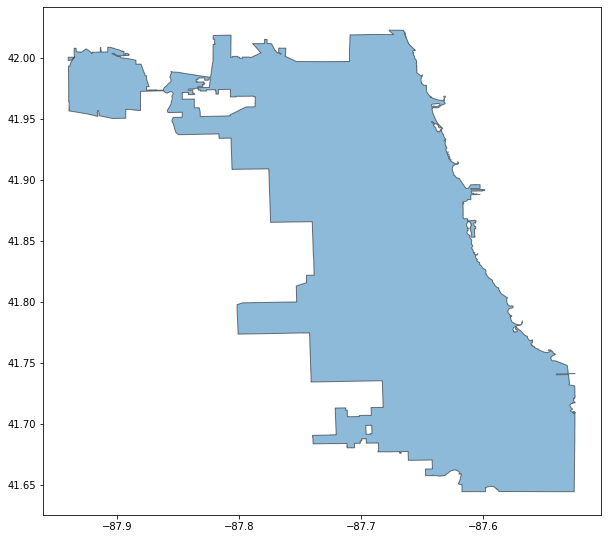

In [4]:
chicago.plot(figsize = (10, 10), alpha=0.5, edgecolor='k')

Text(0.5, 1, 'City Boundary of Chicago')

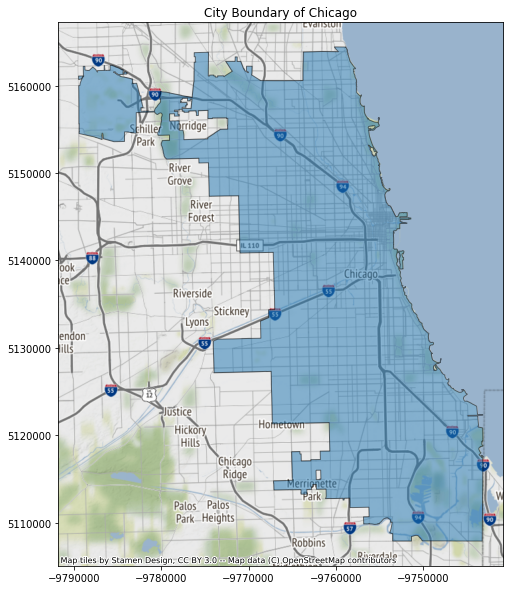

In [5]:
chicago = chicago.to_crs(epsg=3857)

ax = chicago.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)
plt.title('City Boundary of Chicago')

Reading the training data and creating a database. Adding a column called coordinates to create a long, lat tuples for easier access for ploting on the map.

So what's epsg? They're spatial reference systems. 4326 is our regular longitude and latitude while 3857 is used to 
project maps on the web (Web Mercator project). We convert our coordinates to the web readable format in our geo_chicago_df. I thought it would be best to keep chicago_df and geo_chicago_df as seperate entities.  

Text(0.5, 1, 'Trap Locations')

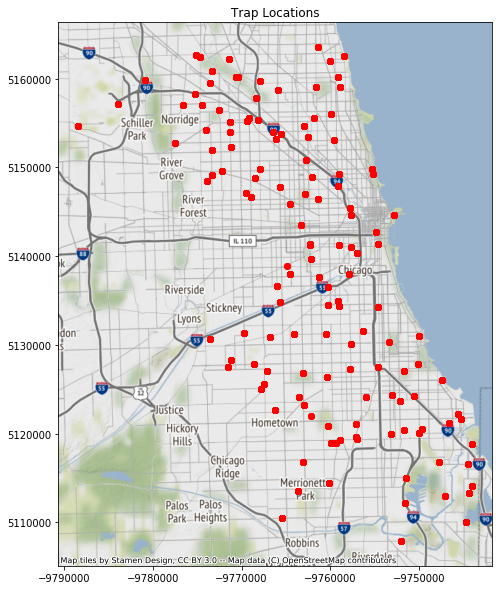

In [6]:
chicago_df = pd.read_csv("../group project/predict-west-nile-virus/train.csv")
chicago_df['Coordinates'] = list(zip(chicago_df.Longitude, chicago_df.Latitude))

#turning the regular chicago dataframe into a geo dataframe so we can plot stuff on the map <3
geo_chicago_df = gpd.GeoDataFrame(
    chicago_df, crs = {'init':'epsg:4326'}, geometry=chicago_df['Coordinates'].apply(Point)
).to_crs(epsg=3857)

ax = geo_chicago_df.plot(figsize=(10, 10), alpha=1, color='red')
ctx.add_basemap(ax)
plt.title('Trap Locations')

Lets put both maps on top of one another.

Text(0.5, 1, 'Trap Locations and Chicago Boundary')

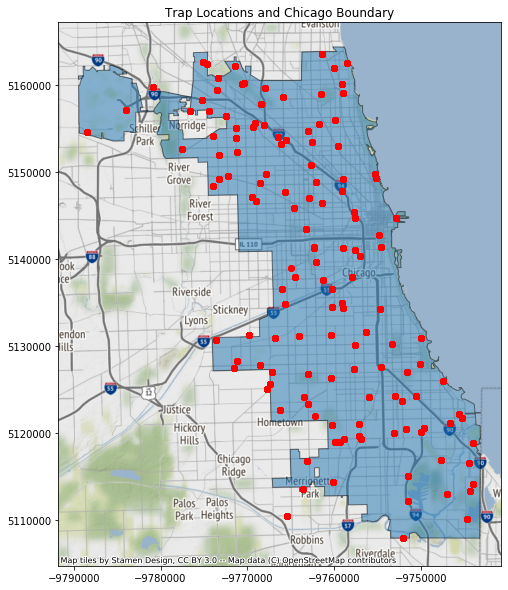

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
chicago.plot(ax=ax, figsize = (10, 10), alpha=0.5, edgecolor='k')
geo_chicago_df.plot(ax=ax, figsize=(10, 10), alpha=1, color='red')

ctx.add_basemap(ax)
ax.set_title('Trap Locations and Chicago Boundary')

In [10]:
display(chicago_df.head())

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Coordinates,geometry
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,"(-87.800991, 41.95469)",POINT (-87.800991 41.95469)
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,"(-87.800991, 41.95469)",POINT (-87.800991 41.95469)
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,"(-87.769279, 41.994991)",POINT (-87.769279 41.994991)
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,"(-87.824812, 41.974089)",POINT (-87.82481199999999 41.974089)
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,"(-87.824812, 41.974089)",POINT (-87.82481199999999 41.974089)
